<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Prediction_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [5]:
!gdown 1DTf1EJfJCUur077EEeUo9X_btpmTi4zJ

Downloading...
From: https://drive.google.com/uc?id=1DTf1EJfJCUur077EEeUo9X_btpmTi4zJ
To: /content/dogs-vs-cats-vvsmall.zip
100% 178M/178M [00:03<00:00, 58.0MB/s]


In [27]:
import matplotlib.pyplot as plt
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tr
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras
from tensorflow.keras import layers
import IPython

from sklearn.metrics import classification_report, confusion_matrix

import os
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras

In [7]:
import zipfile
import os

zip_ref =zipfile.ZipFile('/content/dogs-vs-cats-vvsmall.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
base_dir = '/content/dogs-vs-cats-vvsmall'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with the train cat images
train_cat_dir = os.path.join(train_dir, 'cats')

# Directory with the train dogs images
train_dog_dir = os.path.join(train_dir, 'dogs')

#Directory with the validation cat images
validation_cat_dir = os.path.join(validation_dir, 'cats')

#Directory with the validation dog images
validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [9]:
# print out the names of the first 10 files to give a nice feeling that the files are arranged as expected
# i.e. images of horses in the horses folder and images of humans in the human folder
train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

validation_cat_names = os.listdir(validation_cat_dir)
print(validation_cat_names[:10])

['dog.2379.jpg', 'dog.2784.jpg', 'dog.1595.jpg', 'dog.1337.jpg', 'dog.468.jpg', 'dog.2432.jpg', 'dog.1171.jpg', 'dog.1346.jpg', 'dog.1104.jpg', 'dog.235.jpg']
['cat.1129.jpg', 'cat.736.jpg', 'cat.1887.jpg', 'cat.2753.jpg', 'cat.734.jpg', 'cat.566.jpg', 'cat.2162.jpg', 'cat.16.jpg', 'cat.373.jpg', 'cat.1165.jpg']
['dog.9131.jpg', 'dog.9137.jpg', 'dog.9258.jpg', 'dog.9234.jpg', 'dog.9103.jpg', 'dog.9133.jpg', 'dog.9381.jpg', 'dog.8513.jpg', 'dog.8969.jpg', 'dog.8762.jpg']
['cat.9261.jpg', 'cat.8544.jpg', 'cat.8712.jpg', 'cat.8569.jpg', 'cat.8655.jpg', 'cat.9357.jpg', 'cat.8751.jpg', 'cat.8557.jpg', 'cat.8599.jpg', 'cat.8684.jpg']


#Explore the data

In [10]:
# print out the number of images in the directories
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))    

total training cat images: 3000
total training dog images: 3000
total validation cat images: 900
total validation dog images: 900


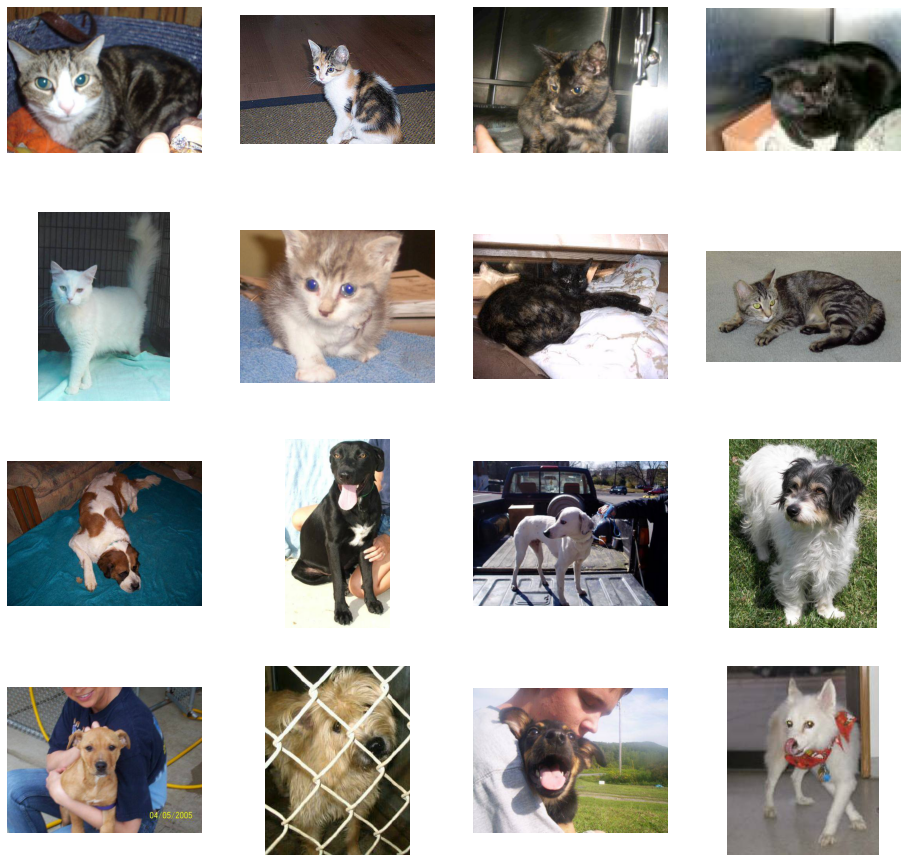

In [11]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_cat_pix = [os.path.join(train_cat_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]

# pick the first 8 human pictures
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Data augmentation

In [12]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

#Data Preparation.

#Normalise the images and re-size them to the same size

In [13]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'dogs-vs-cats-vvsmall',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'dogs-vs-cats-vvsmall',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 7800 images belonging to 2 classes.
Found 7800 images belonging to 2 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(300,300,3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.5))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 dropout (Dropout)           (None, 300, 300, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)       

In [15]:
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)
     

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=15
                  )             

Epoch 1/15
244/244 [==============================] - 104s 358ms/step - loss: 2.0615 - accuracy: 0.7610 - val_loss: 0.5596 - val_accuracy: 0.7692
Epoch 2/15
244/244 [==============================] - 84s 344ms/step - loss: 2.1198 - accuracy: 0.7692 - val_loss: 0.6048 - val_accuracy: 0.7692
Epoch 3/15
244/244 [==============================] - 88s 360ms/step - loss: 2.0421 - accuracy: 0.7692 - val_loss: 0.6035 - val_accuracy: 0.7692
Epoch 4/15
244/244 [==============================] - 84s 344ms/step - loss: 1.9861 - accuracy: 0.7692 - val_loss: 0.5828 - val_accuracy: 0.7692
Epoch 5/15
244/244 [==============================] - 84s 345ms/step - loss: 2.0631 - accuracy: 0.7692 - val_loss: 0.5905 - val_accuracy: 0.7692
Epoch 6/15
244/244 [==============================] - 84s 345ms/step - loss: 1.9687 - accuracy: 0.7692 - val_loss: 0.5616 - val_accuracy: 0.7692
Epoch 7/15
244/244 [==============================] - 87s 356ms/step - loss: 2.0989 - accuracy: 0.7692 - val_loss: 0.5865 - val_a

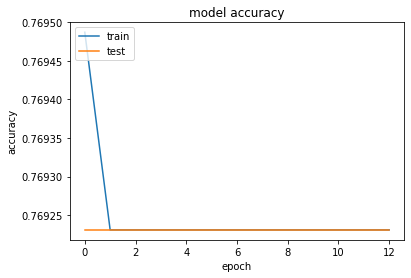

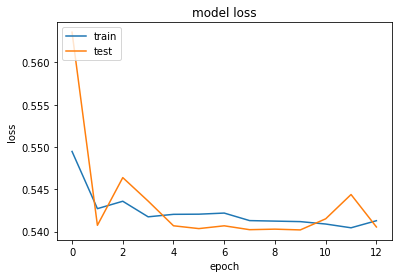

In [31]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import keras


BATCH_SIZE = 32
EPOCHS = 15

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    directory="/content/dogs-vs-cats-vvsmall",
    target_size=(150, 150),
    batch_size=12,
    class_mode="binary"
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    directory="/content/dogs-vs-cats-vvsmall",
    target_size=(150, 150),
    batch_size=12,
    class_mode="binary"
)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])


Found 7800 images belonging to 2 classes.
Found 7800 images belonging to 2 classes.


In [29]:
from keras.optimizers import Adam

# Set the learning rate
learning_rate = 0.001

# Define the optimizer with the specified learning rate
opt = Adam(learning_rate=learning_rate)
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    epochs=EPOCHS,
                    validation_data=val_generator,
                    validation_steps=val_generator.n//val_generator.batch_size,callbacks=[early_stopping])
print(model.summary())



Epoch 1/15
650/650 [==============================] - 92s 140ms/step - loss: 0.5495 - accuracy: 0.7695 - val_loss: 0.5636 - val_accuracy: 0.7692
Epoch 2/15
650/650 [==============================] - 91s 141ms/step - loss: 0.5427 - accuracy: 0.7692 - val_loss: 0.5407 - val_accuracy: 0.7692
Epoch 3/15
650/650 [==============================] - 90s 138ms/step - loss: 0.5436 - accuracy: 0.7692 - val_loss: 0.5464 - val_accuracy: 0.7692
Epoch 4/15
650/650 [==============================] - 90s 139ms/step - loss: 0.5418 - accuracy: 0.7692 - val_loss: 0.5436 - val_accuracy: 0.7692
Epoch 5/15
650/650 [==============================] - 90s 138ms/step - loss: 0.5420 - accuracy: 0.7692 - val_loss: 0.5407 - val_accuracy: 0.7692
Epoch 6/15
650/650 [==============================] - 90s 138ms/step - loss: 0.5421 - accuracy: 0.7692 - val_loss: 0.5404 - val_accuracy: 0.7692
Epoch 7/15
650/650 [==============================] - 88s 136ms/step - loss: 0.5422 - accuracy: 0.7692 - val_loss: 0.5407 - val_ac

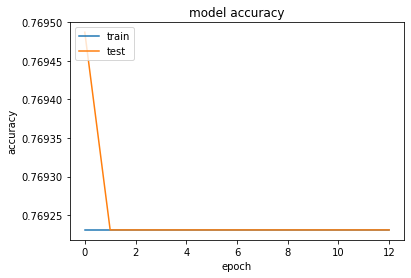

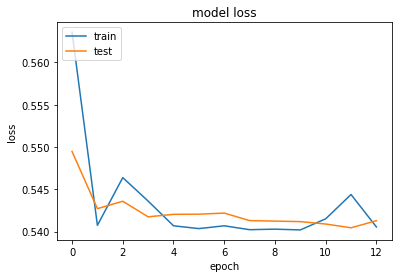

In [30]:
# summarize the history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()